# **Census tract-level air pollution data analysis of Ontario city, San Berdarnido, 2021** 
Author: Yu-Chen Chu

Group Members: Georgie Suico, Matthews Cribioli, Alejandra Gutierrez

Description: This is the health and air pollution analysis of Ontario city, San Berdarnido. The data source is from CalEnviroScreen, OEHHA. The current data may show relation to the location and spread of warehouses.

Source Link: https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40

## Import the libraries

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Import the file

In [2]:
# I want to see all the data
pd.set_option('display.max_columns', None)

# import the data into a new variable
CalEnviroScreen = pd.read_excel("../Data/calenviroscreen40resultsdatadictionary_F_2021.xlsx")
CalEnviroScreen.head()

Census Tract  Total Population California County    ZIP  \
0    6019001100              2780           Fresno   93706   
1    6077000700              4680       San Joaquin  95206   
2    6037204920              2751       Los Angeles  90023   
3    6019000700              3664           Fresno   93706   
4    6019000200              2689           Fresno   93706   

  Approximate Location   Longitude   Latitude  CES 4.0 Score  \
0               Fresno -119.781696  36.709695      93.183570   
1             Stockton -121.287873  37.943173      86.653790   
2          Los Angeles -118.197497  34.017500      82.393909   
3               Fresno -119.827707  36.734535      81.327940   
4               Fresno -119.805504  36.735491      80.745476   

   CES 4.0 Percentile  CES 4.0 Percentile Range     Ozone  Ozone Pctl  \
0          100.000000  95-100% (highest scores)  0.060311   82.476665   
1           99.987393  95-100% (highest scores)  0.045884   44.978220   
2           99.974786  95-100% (highest scores)  0.047920   53.727442   
3           99.962179  95-100% (highest scores)  0.060311   82.476665   
4           99.949571  95-100% (highest scores)  0.060311   82.476665   

       PM2.5  PM2.5 Pctl  Diesel PM  Diesel PM Pctl  Drinking Water  \
0  13.906348   97.710019   1.122712       98.718108      733.946935   
1  11.884085   72.594897   0.538105       91.151213      389.846569   
2  12.251640   89.209708   0.780833       96.552582      787.940335   
3  13.520939   95.880523   0.173815       57.087741      733.946935   
4  13.818959   97.473553   1.389658       99.303049      733.946935   

   Drinking Water Pctl       Lead  Lead Pctl  Pesticides  Pesticides Pctl  \
0            84.388660  89.600854  96.471330    1.001925        42.896552   
1            41.551143  77.302272  86.830498   63.132574        73.655172   
2            92.531535  92.563660  98.399496    0.000000         0.000000   
3            84.388660  68.385084  77.000630   44.574874        71.586207   
4            84.388660  75.414535  85.116572   16.625496        64.413793   

   Tox. Release  Tox. Release Pctl      Traffic  Traffic Pctl  Cleanup Sites  \
0   4859.094604          92.198050  1037.095744       60.3750          70.50   
1    519.628001          52.350588   856.395935       48.2875          61.90   
2   3682.693278          87.734434  2522.622269       92.8375          38.75   
3   1630.342707          74.931233   690.502159       35.2750          16.50   
4   1975.207988          78.957239   909.650882       52.2625          10.50   

   Cleanup Sites Pctl  Groundwater Threats  Groundwater Threats Pctl  \
0           98.189623                54.25                 91.167192   
1           97.461739                78.60                 95.085506   
2           92.963792                20.50                 68.919143   
3           77.323628                 9.50                 44.828159   
4           62.448675                28.25                 78.050805   

   Haz. Waste  Haz. Waste Pctl  Imp. Water Bodies  Imp. Water Bodies Pctl  \
0        3.10        96.307081                  0                0.000000   
1        1.27        88.577101                 13               91.873163   
2       11.62        99.655857                  7               66.736665   
3        2.36        94.123097                  0                0.000000   
4        0.35        56.399735                  0                0.000000   

   Solid Waste  Solid Waste Pctl  Pollution Burden  Pollution Burden Score  \
0         6.00         79.954181         78.977404                9.643125   
1         9.25         89.278351         73.434993                8.966398   
2         4.85         73.081329         77.673177                9.483880   
3         5.75         78.144330         67.846836                8.284085   
4         0.00          0.000000         66.825950                8.159435   

   Pollution Burden Pctl  Asthma  Asthma Pctl  Low Birth Weight  \
0  

## Check the basic info of the file

In [3]:
# Check the shape
CalEnviroScreen.shape

(8035, 58)

In [4]:
# Check the columns' datatype
CalEnviroScreen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   int64  
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

## Convert the data type
The datatype of "Census Tract" is interger, which is the reason that those fips code lack "0" in front of them. Thus, I have to convert them to "string".

In [5]:
# Re-import the file and convert "int" to "str"

CalEnviroScreen = pd.read_excel(
    '../Data/calenviroscreen40resultsdatadictionary_F_2021.xlsx',
    dtype=
    {'Census Tract':str,
     'ZIP':str
    }
)

# See the first two rows
CalEnviroScreen.head(2)

Census Tract  Total Population California County    ZIP  \
0   6019001100              2780           Fresno   93706   
1   6077000700              4680       San Joaquin  95206   

  Approximate Location   Longitude   Latitude  CES 4.0 Score  \
0               Fresno -119.781696  36.709695       93.18357   
1             Stockton -121.287873  37.943173       86.65379   

   CES 4.0 Percentile  CES 4.0 Percentile Range     Ozone  Ozone Pctl  \
0          100.000000  95-100% (highest scores)  0.060311   82.476665   
1           99.987393  95-100% (highest scores)  0.045884   44.978220   

       PM2.5  PM2.5 Pctl  Diesel PM  Diesel PM Pctl  Drinking Water  \
0  13.906348   97.710019   1.122712       98.718108      733.946935   
1  11.884085   72.594897   0.538105       91.151213      389.846569   

   Drinking Water Pctl       Lead  Lead Pctl  Pesticides  Pesticides Pctl  \
0            84.388660  89.600854  96.471330    1.001925        42.896552   
1            41.551143  77.302272  86.830498   63.132574        73.655172   

   Tox. Release  Tox. Release Pctl      Traffic  Traffic Pctl  Cleanup Sites  \
0   4859.094604          92.198050  1037.095744       60.3750           70.5   
1    519.628001          52.350588   856.395935       48.2875           61.9   

   Cleanup Sites Pctl  Groundwater Threats  Groundwater Threats Pctl  \
0           98.189623                54.25                 91.167192   
1           97.461739                78.60                 95.085506   

   Haz. Waste  Haz. Waste Pctl  Imp. Water Bodies  Imp. Water Bodies Pctl  \
0        3.10        96.307081                  0                0.000000   
1        1.27        88.577101                 13               91.873163   

   Solid Waste  Solid Waste Pctl  Pollution Burden  Pollution Burden Score  \
0         6.00         79.954181         78.977404                9.643125   
1         9.25         89.278351         73.434993                8.966398   

   Pollution Burden Pctl  Asthma  Asthma Pctl  Low Birth Weight  \
0              99.925327  129.54    97.220837              7.80   
1              99.290604  105.88    94.217348              6.88   

   Low Birth Weight Pctl  Cardiovascular Disease  Cardiovascular Disease Pctl  \
0              95.624840                   21.47                    92.248255   
1              88.722094                   20.26                    88.123131   

   Education  Education Pctl  Linguistic Isolation  Linguistic Isolation Pctl  \
0       44.5       93.229562                  16.0                  79.374746   
1       46.4       94.469754                  29.7                  95.533902   

   Poverty  Poverty Pctl  Unemployment  Unemployment Pctl  Housing Burden  \
0     76.0     98.919598          12.8          93.831338            30.3   
1     73.2     98.391960          19.8          99.206143            31.2   

   Housing Burden Pctl  Pop. Char.   Pop. Char. Score  Pop. Char. Pctl  
0            91.039290    93.155109          9.663213        99.722642  
1            92.281369    93.165408          9.664281        99.735250

In [6]:
# Check the columns' datatype again
CalEnviroScreen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   object 
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   object 
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

In [7]:
# Check the census tract
CalEnviroScreen.head(2)

Census Tract  Total Population California County    ZIP  \
0   6019001100              2780           Fresno   93706   
1   6077000700              4680       San Joaquin  95206   

  Approximate Location   Longitude   Latitude  CES 4.0 Score  \
0               Fresno -119.781696  36.709695       93.18357   
1             Stockton -121.287873  37.943173       86.65379   

   CES 4.0 Percentile  CES 4.0 Percentile Range     Ozone  Ozone Pctl  \
0          100.000000  95-100% (highest scores)  0.060311   82.476665   
1           99.987393  95-100% (highest scores)  0.045884   44.978220   

       PM2.5  PM2.5 Pctl  Diesel PM  Diesel PM Pctl  Drinking Water  \
0  13.906348   97.710019   1.122712       98.718108      733.946935   
1  11.884085   72.594897   0.538105       91.151213      389.846569   

   Drinking Water Pctl       Lead  Lead Pctl  Pesticides  Pesticides Pctl  \
0            84.388660  89.600854  96.471330    1.001925        42.896552   
1            41.551143  77.302272  86.830498   63.132574        73.655172   

   Tox. Release  Tox. Release Pctl      Traffic  Traffic Pctl  Cleanup Sites  \
0   4859.094604          92.198050  1037.095744       60.3750           70.5   
1    519.628001          52.350588   856.395935       48.2875           61.9   

   Cleanup Sites Pctl  Groundwater Threats  Groundwater Threats Pctl  \
0           98.189623                54.25                 91.167192   
1           97.461739                78.60                 95.085506   

   Haz. Waste  Haz. Waste Pctl  Imp. Water Bodies  Imp. Water Bodies Pctl  \
0        3.10        96.307081                  0                0.000000   
1        1.27        88.577101                 13               91.873163   

   Solid Waste  Solid Waste Pctl  Pollution Burden  Pollution Burden Score  \
0         6.00         79.954181         78.977404                9.643125   
1         9.25         89.278351         73.434993                8.966398   

   Pollution Burden Pctl  Asthma  Asthma Pctl  Low Birth Weight  \
0              99.925327  129.54    97.220837              7.80   
1              99.290604  105.88    94.217348              6.88   

   Low Birth Weight Pctl  Cardiovascular Disease  Cardiovascular Disease Pctl  \
0              95.624840                   21.47                    92.248255   
1              88.722094                   20.26                    88.123131   

   Education  Education Pctl  Linguistic Isolation  Linguistic Isolation Pctl  \
0       44.5       93.229562                  16.0                  79.374746   
1       46.4       94.469754                  29.7                  95.533902   

   Poverty  Poverty Pctl  Unemployment  Unemployment Pctl  Housing Burden  \
0     76.0     98.919598          12.8          93.831338            30.3   
1     73.2     98.391960          19.8          99.206143            31.2   

   Housing Burden Pctl  Pop. Char.   Pop. Char. Score  Pop. Char. Pctl  
0            91.039290    93.155109          9.663213        99.722642  
1            92.281369    93.165408          9.664281        99.735250

## Add back "0"
It still lacks "0" in the beginning of the Census Tract fips code. I look back the csv. file that I downloaded. It lack 0 already in the file, so I have to add 0 back. Before adding back the "0", it is better to replace spaces with underscores to avoid errors in all the columns. 

In [8]:
# Replace spaces with underscores in all columns to avoid operation errors 
CalEnviroScreen.rename(columns={col: col.replace(" ", "_") for col in CalEnviroScreen.columns}, inplace=True)
CalEnviroScreen

Census_Tract  Total_Population California_County    ZIP  \
0      6019001100              2780           Fresno   93706   
1      6077000700              4680       San Joaquin  95206   
2      6037204920              2751       Los Angeles  90023   
3      6019000700              3664           Fresno   93706   
4      6019000200              2689           Fresno   93706   
...           ...               ...               ...    ...   
8030   6107004000               582           Tulare   93257   
8031   6109985202              2509         Tuolumne   95327   
8032   6111001206               778          Ventura   93001   
8033   6111003012               675          Ventura   93036   
8034   6111980000               118          Ventura      61   

                     Approximate_Location   Longitude   Latitude  \
0                                  Fresno -119.781696  36.709695   
1                                Stockton -121.287873  37.943173   
2                             Los Angeles -118.197497  34.017500   
3                                  Fresno -119.827707  36.734535   
4                                  Fresno -119.805504  36.735491   
...                                   ...         ...        ...   
8030                          Porterville -118.983849  36.038061   
8031  Unincorporated Tuolumne County area -120.537071  37.891939   
8032   Unincorporated Ventura County area -119.371944  34.343903   
8033                               Oxnard -119.180105  34.235076   
8034   Unincorporated Ventura County area -119.503588  33.255655   

      CES_4.0_Score  CES_4.0_Percentile  CES_4.0_Percentile_Range     Ozone  \
0         93.183570          100.000000  95-100% (highest scores)  0.060311   
1         86.653790           99.987393  95-100% (highest scores)  0.045884   
2         82.393909           99.974786  95-100% (highest scores)  0.047920   
3         81.327940           99.962179  95-100% (highest scores)  0.060311   
4         80.745476           99.949571  95-100% (highest scores)  0.060311   
...             ...                 ...                       ...       ...   
8030            NaN                 NaN                       NaN  0.060311   
8031            NaN                 NaN                       NaN  0.056800   
8032            NaN                 NaN                       NaN  0.042554   
8033            NaN                 NaN                       NaN  0.042599   
8034            NaN                 NaN                       NaN  0.042599   

      Ozone_Pctl      PM2.5  PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl  \
0      82.476665  13.906348   97.710019   1.122712       98.718108   
1      44.978220  11.884085   72.594897   0.538105       91.151213   
2      53.727442  12.251640   89.209708   0.780833       96.552582   
3      82.476665  13.520939   95.880523   0.173815       57.087741   
4      82.476665  13.818959   97.473553   1.389658       99.303049   
...          ...        ...         ...        ...             ...   
8030   82.476665  13.179824   94.486621   0.051459       18.618544   
8031   75.121344   9.232356   40.958307   0.081965       30.553827   
8032   26.845053   8.224548   16.739266   0.029517       10.466708   
8033   29.894213   8.981781   36.938395   0.563084       91.823273   
8034   29.894213   5.915569    2.874922   0.003326        1.431238   

      Drinking_Water  Drinking_Water_Pctl       Lead  Lead_Pctl  Pesticides  \
0         733.946935            84.388660  89.600854  96.471330    1.001925   
1         389.846569            41.551143  77.302272  86.830498   63.132574   
2         787.940335            92.531535  92.563660  98.399496    0.000000   
3         733.946935            84.388660  68.385084  77.000630   44.574874   
4         733.946935            84.388660  75.414535  85.116572   16.625496   
...              ...                  ...        ...        ...         ...   
8030      634.315048            71.150244        NaN        NaN  941.231820 

In [9]:
# Check the percentile
CalEnviroScreen.sort_values(by='Ozone_Pctl', ascending=True)

Census_Tract  Total_Population California_County    ZIP  \
3870   6015000101              4101         Del Norte  95531   
3663   6023000500              4450         Humboldt   95501   
6206   6023000600              4998         Humboldt   95501   
3357   6015000102              3302         Del Norte  95531   
5062   6015000104              2428         Del Norte  95531   
...           ...               ...               ...    ...   
6203   6071008302              3467    San Bernardino  92373   
4535   6071010804              2620    San Bernardino  92407   
1112   6071007303              5039    San Bernardino  92354   
4545   6071008500              8540    San Bernardino  92373   
3487   6071008710              4417    San Bernardino  92399   

                      Approximate_Location   Longitude   Latitude  \
3870                         Crescent City -124.204051  41.744315   
3663                                Eureka -124.151398  40.802544   
6206                                Eureka -124.150129  40.788607   
3357                     Bertsch-Oceanview -124.163291  41.759776   
5062  Unincorporated Del Norte County area -124.193061  41.775514   
...                                    ...         ...        ...   
6203                              Redlands -117.189952  34.029699   
4535                             Crestline -117.279282  34.253664   
1112                            Loma Linda -117.268242  34.055684   
4545                              Redlands -117.136567  34.018320   
3487                               Yucaipa -117.049096  34.025704   

      CES_4.0_Score  CES_4.0_Percentile CES_4.0_Percentile_Range     Ozone  \
3870      26.140225           51.210287                   50-55%  0.026554   
3663      27.427848           53.819970                   50-55%  0.026554   
6206      13.523153           21.759960                   20-25%  0.026554   
3357      29.435390           57.677761                   55-60%  0.026554   
5062      19.484384           36.182552                   35-40%  0.026554   
...             ...                 ...                      ...       ...   
6203      13.533952           21.797781                   20-25%  0.073132   
4535      22.323921           42.826525                   40-45%  0.073132   
1112      48.345789           85.980837                   85-90%  0.073132   
4545      22.278158           42.700454                   40-45%  0.073132   
3487      28.583111           56.038830                   55-60%  0.073132   

      Ozone_Pctl      PM2.5  PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl  \
3870    0.186683   6.541252    5.140012   0.094314       35.320473   
3663    0.186683   6.621305    5.463597   0.214923       64.629745   
6206    0.186683   6.596243    5.339141   0.056856       20.721842   
3357    0.186683   5.746661    2.601120   0.025990        9.122589   
5062    0.186683   6.393087    4.542626   0.048057       17.125078   
...          ...        ...         ...        ...             ...   
6203  100.000000  11.205005   56.913503   0.086542       32.345986   
4535  100.000000   9.303744   42.028625   0.032988       11.649035   
1112  100.000000  11.645716   64.256378   0.594337       92.831363   
4545  100.000000  10.782039   53.478531   0.163852       54.660859   
3487  100.000000   9.938658   48.438083   0.086864       32.470442   

      Drinking_Water  Drinking_Water_Pctl       Lead  Lead_Pctl  Pesticides  \
3870      321.076287            30.385912  55.292151  59.243856    0.000000   
3663      182.432387             6.194580  54.978307  58.752363    0.000000   
6206       89.000985             0.636943  64.860381  72.640202    0.000000   
3357      312.757492            25.952292  38.367755  34.732199    0.000000   
5062      339.842364            34.794555  52.138366  54.643982    0.000000   
...              ...                  ...        ...        ...         ...   
6203      681.645572            75.296615  56.684717  61.083806    0.199605 

In [10]:
# Add 0 back and subset the dataframe to San Berdarnido

CalEnviroScreen.loc[(CalEnviroScreen.California_County == 'San Bernardino'),'Census_Tract']='0'+ CalEnviroScreen.loc[(CalEnviroScreen.California_County == 'San Bernardino'),'Census_Tract']


# Print it to check 
CalEnviroScreen[CalEnviroScreen['California_County']=='San Bernardino']

Census_Tract  Total_Population California_County    ZIP  \
30    06071001600              5363    San Bernardino  91761   
133   06071012500              4972    San Bernardino  92324   
134   06071004900              7113    San Bernardino  92410   
165   06071005701              1580    San Bernardino  92401   
195   06071000301              9434    San Bernardino  91763   
...           ...               ...               ...    ...   
7561  06071940100              1312    San Bernardino  92242   
7588  06071002011              4233    San Bernardino  91701   
8007  06071012300              4966    San Bernardino  92346   
8008  06071980100                 0    San Bernardino  92408   
8009  06071980200              3817    San Bernardino  92394   

                           Approximate_Location   Longitude   Latitude  \
30                                      Ontario -117.618013  34.057780   
133                                      Colton -117.323304  34.060209   
134                              San Bernardino -117.316879  34.100314   
165                              San Bernardino -117.292606  34.100640   
195                                   Montclair -117.699633  34.063215   
...                                         ...         ...        ...   
7561  Unincorporated San Bernardino County area -114.306484  34.188779   
7588                           Rancho Cucamonga -117.616357  34.154157   
8007                             San Bernardino -117.219758  34.139018   
8008                             San Bernardino -117.239834  34.097865   
8009                                Victorville -117.371788  34.585281   

      CES_4.0_Score  CES_4.0_Percentile  CES_4.0_Percentile_Range     Ozone  \
30        74.666445           99.621785  95-100% (highest scores)  0.062441   
133       66.692679           98.323248  95-100% (highest scores)  0.070001   
134       66.664401           98.310640  95-100% (highest scores)  0.071566   
165       65.320173           97.919818  95-100% (highest scores)  0.073132   
195       64.203083           97.541604  95-100% (highest scores)  0.059387   
...             ...                 ...                       ...       ...   
7561       6.020449            4.677257      1-5% (lowest scores)  0.039755   
7588       5.810742            4.336863      1-5% (lowest scores)  0.067183   
8007            NaN                 NaN                       NaN  0.073132   
8008            NaN                 NaN                       NaN  0.073132   
8009            NaN                 NaN                       NaN  0.060311   

      Ozone_Pctl      PM2.5  PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl  \
30     88.823895  13.785161   97.398880   0.418891       86.011201   
133    98.668326  11.924275   74.312383   0.770918       96.403236   
134    99.066584  11.538951   61.754823   0.881550       97.373989   
165   100.000000  11.368704   58.718108   0.342647       80.472931   
195    79.987554  13.112614   94.225264   0.302569       76.739266   
...          ...        ...         ...        ...             ...   
7561   20.846297   9.525415   44.779091   0.002725        1.082763   
7588   97.000622  13.059671   94.013690   0.023414        8.413192   
8007  100.000000  10.921930   54.237710   0.020900        7.517113   
8008  100.000000  11.253279   57.485999   0.149435       51.064095   
8009   82.476665   7.421573    9.197262   0.006370        2.613566   

      Drinking_Water  Drinking_Water_Pctl       Lead  Lead_Pctl  Pesticides  \
30        796.646508            93.268390  90.814634  97.366100    0.015553   
133       424.829260            48.794805  87.336581  94.996849    0.000000   
134       526.183880            62.820032  77.303641  86.843100    0.000000   
165       404.578192            44.111403  77.777105  87.246377    0.000000   
195       709.429878            78.293993  60.810143  66.969124    0.151823   
...              ...                  ...        ...        ...         ...   
7561

# Loading Ontario Census Tract Data

Now we have the the data of San Berdarnido, we still need the census tract data of Ontario to demonstrate the map. 

In [11]:
# Import the census tract dataframe and convert fips code into "str" 
censustracts =pd.read_csv('ontario.csv', 
            dtype= 
            {
        'STATEFP':str,
        'COUNTYFP':str,
        'GEOID':str
            })
censustracts

Unnamed: 0 STATEFP COUNTYFP  TRACTCE              AFFGEOID        GEOID  \
0          435      06      071     1307  1400000US06071001307  06071001307   
1          436      06      071     1703  1400000US06071001703  06071001703   
2          437      06      071     1812  1400000US06071001812  06071001812   
3          717      06      071     1002  1400000US06071001002  06071001002   
4          718      06      071     1310  1400000US06071001310  06071001310   
5          719      06      071     1503  1400000US06071001503  06071001503   
6          720      06      071     1707  1400000US06071001707  06071001707   
7          721      06      071     1810  1400000US06071001810  06071001810   
8         1627      06      071     1101  1400000US06071001101  06071001101   
9         2637      06      071     1308  1400000US06071001308  06071001308   
10        3262      06      071     1808  1400000US06071001808  06071001808   
11        3503      06      071      304  1400000US06071000304  06071000304   
12        3509      06      071     1104  1400000US06071001104  06071001104   
13        3510      06      071     1309  1400000US06071001309  06071001309   
14        3511      06      071     1501  1400000US06071001501  06071001501   
15        3512      06      071     1706  1400000US06071001706  06071001706   
16        4715      06      071     1903  1400000US06071001903  06071001903   
17        4716      06      071     1905  1400000US06071001905  06071001905   
18        4862      06      071     1809  1400000US06071001809  06071001809   
19        4898      06      071    12700  1400000US06071012700  06071012700   
20        5064      06      071     1103  1400000US06071001103  06071001103   
21        5065      06      071     1200  1400000US06071001200  06071001200   
22        5066      06      071     1305  1400000US06071001305  06071001305   
23        5068      06      071     1400  1400000US06071001400  06071001400   
24        5070      06      071     1504  1400000US06071001504  06071001504   
25        5071      06      071     1704  1400000US06071001704  06071001704   
26        5072      06      071     1806  1400000US06071001806  06071001806   
27        6539      06      071     1312  1400000US06071001312  06071001312   
28        6540      06      071     1804  1400000US06071001804  06071001804   
29        6544      06      071     2206  1400000US06071002206  06071002206   
30        7177      06      071     1803  1400000US06071001803  06071001803   
31        7388      06      071      603  1400000US06071000603  06071000603   
32        7390      06      071     1702  1400000US06071001702  06071001702   
33        7391      06      071     1813  1400000US06071001813  06071001813   
34        7617      06      071     1001  1400000US06071001001  06071001001   
35        7698      06      071     1600  1400000US06071001600  06071001600   
36        7699      06      071     1906  1400000US06071001906  06071001906   
37        7701      06      071     2109  1400000US06071002109  06071002109   

      NAME LSAD     ALAND  AWATER  \
0    13.07   CT   1281879       0   
1    17.03   CT   1909759       0   
2    18.12   CT    888388       0   
3    10.02   CT   1203162       0   
4    13.10   CT   1417244       0   
5    15.03   CT    553555       0   
6    17.07   CT   1709523       0   
7    18.10   CT    988342       0   
8    11.01   CT    791646       0   
9    13.08   CT   1077531       0   
10   18.08   CT   1130298       0   
11    3.04   CT   3266983       0   
12   11.04   CT   1792399       0   
13   13.09   CT   1302941       0   
14   15.01   CT    751632       0   
15   17.06   CT   1114627       0   
16   19.03   CT  40433392  249662   
17   19.05   CT  14639342       0   
18   18.09   CT   2351671       0   
19  127.00   CT  26807887       0   
20   11.03   CT   1672684       0   
21   12.00   CT   1540373       0   
22   13.05   CT   1178835       0   
23   14.00   CT   1145113       0 

In [12]:
# Check the shape of the dataframe 
censustracts.shape

(38, 11)

## Setting the 'geometry' column as a geometry data type

The geometry column is still "object", which cannot be shown on the map. So we have to convert it to "geometry" type to map the data.

In [13]:
# Check the datatypes
censustracts.dtypes

Unnamed: 0      int64
STATEFP        object
COUNTYFP       object
TRACTCE         int64
AFFGEOID       object
GEOID          object
NAME          float64
LSAD           object
ALAND           int64
AWATER          int64
geometry       object
dtype: object

In [14]:
# Convert datatype from "object" to "geometry" 
from shapely.wkt import loads
censustracts.geometry =  censustracts['geometry'].apply(loads)

censustracts=censustracts.set_geometry('geometry')

censustracts.dtypes

Unnamed: 0       int64
STATEFP         object
COUNTYFP        object
TRACTCE          int64
AFFGEOID        object
GEOID           object
NAME           float64
LSAD            object
ALAND            int64
AWATER           int64
geometry      geometry
dtype: object

## Subset the data

Now we have the census tract of Ontario city, we have to subset the CalEnviroScreen dataframe to Ontario city 

In [15]:
# subset rows of Ontario city

# This is the census tract fips code of Ontario city I get from my group members.
options = ['06071001903','06071001906','06071001905','06071001703','06071001804','06071001806','06071001808',
           '06071001809','06071002206','06071012700','06071001803','06071001810','06071001704','06071001702','06071001707',
           '06071001812','06071001813','06071001600','06071001001','06071001002','06071001101','06071001400','06071001501',
           '06071001503','06071001104','06071001706','06071000603','06071000304','06071001103','06071001200','06071001310',
           '06071001309','06071001305','06071001308','06071001312','06071002109','06071001504','06071001307'] 

# filter the "census tract" within the option. 
ontariotracts = CalEnviroScreen[CalEnviroScreen['Census_Tract'].isin(options)] 
ontariotracts

Census_Tract  Total_Population California_County    ZIP  \
30    06071001600              5363    San Bernardino  91761   
281   06071001803              3263    San Bernardino  91761   
312   06071001501              4218    San Bernardino  91764   
361   06071001101              4173    San Bernardino  91762   
770   06071001400              2863    San Bernardino  91762   
922   06071001813              4855    San Bernardino  91761   
972   06071001104              6140    San Bernardino  91762   
976   06071001308              4643    San Bernardino  91764   
1123  06071001305              5788    San Bernardino  91764   
1227  06071001504              6006    San Bernardino  91764   
1245  06071001812              3477    San Bernardino  91761   
1259  06071001309              4658    San Bernardino  91764   
1272  06071000304              6223    San Bernardino  91763   
1298  06071001704              5273    San Bernardino  91762   
1314  06071001706              6283    San Bernardino  91762   
1315  06071001809              4975    San Bernardino  91761   
1324  06071001503              4126    San Bernardino  91764   
1375  06071001001              5557    San Bernardino  91762   
1556  06071001702              5300    San Bernardino  91762   
1635  06071001810              5273    San Bernardino  91761   
1657  06071001310              6193    San Bernardino  91764   
1867  06071001906             10032    San Bernardino  91761   
1884  06071001312              5127    San Bernardino  91764   
1937  06071002206              7293    San Bernardino  91761   
1951  06071000603              5508    San Bernardino  91710   
1968  06071001103              4426    San Bernardino  91762   
2059  06071001307              4212    San Bernardino  91764   
2108  06071001905              6981    San Bernardino  91761   
2117  06071001002              5929    San Bernardino  91762   
2217  06071001903             13753    San Bernardino  91708   
2219  06071001806              4797    San Bernardino  91761   
2497  06071001707              6525    San Bernardino  91762   
2509  06071001200              4905    San Bernardino  91764   
2571  06071001804              5250    San Bernardino  91761   
2784  06071012700              3920    San Bernardino  91761   
2888  06071001703              5680    San Bernardino  91710   
3635  06071002109              6121    San Bernardino  91764   
3687  06071001808              4644    San Bernardino  91761   

     Approximate_Location   Longitude   Latitude  CES_4.0_Score  \
30                Ontario -117.618013  34.057780      74.666445   
281               Ontario -117.617420  34.040951      61.640894   
312               Ontario -117.640985  34.067262      60.614954   
361               Ontario -117.662992  34.066071      59.531752   
770               Ontario -117.651011  34.066796      52.220832   
922               Ontario -117.642282  34.048283      50.493789   
972               Ontario -117.665401  34.078109      49.909349   
976               Ontario -117.615316  34.078896      49.866899   
1123              Ontario -117.627950  34.084507      48.278648   
1227              Ontario -117.619992  34.067044      47.029244   
1245              Ontario -117.647047  34.042910      46.906093   
1259              Ontario -117.624712  34.074573      46.781515   
1272            Montclair -117.694086  34.053654      46.604028   
1298              Ontario -117.660072  34.035787      46.316368   
1314              Ontario -117.661155  34.052620      46.152210   
1315              Ontario -117.603523  34.024690      46.139572   
1324              Ontario -117.632425  34.066708      46.045632   
1375              Ontario -117.675483  34.080802      45.562182   
1556              Ontario -117.675321  34.044816      43.716424   
1635              Ontario -117.644031  34.033912      42.935486   
1657              Ontario -117.636899  34.078074      42.760699   
1867              Ontario -117.575

In [16]:
# See the shape of the df
ontariotracts.shape

(38, 58)

In [17]:
# See the columns 
ontariotracts.columns

Index(['Census_Tract', 'Total_Population', 'California_County', 'ZIP',
       'Approximate_Location', 'Longitude', 'Latitude', 'CES_4.0_Score',
       'CES_4.0_Percentile', 'CES_4.0_Percentile_Range', 'Ozone', 'Ozone_Pctl',
       'PM2.5', 'PM2.5_Pctl', 'Diesel_PM', 'Diesel_PM_Pctl', 'Drinking_Water',
       'Drinking_Water_Pctl', 'Lead', 'Lead_Pctl', 'Pesticides',
       'Pesticides_Pctl', 'Tox._Release', 'Tox._Release_Pctl', 'Traffic',
       'Traffic_Pctl', 'Cleanup_Sites', 'Cleanup_Sites_Pctl',
       'Groundwater_Threats', 'Groundwater_Threats_Pctl', 'Haz._Waste',
       'Haz._Waste_Pctl', 'Imp._Water_Bodies', 'Imp._Water_Bodies_Pctl',
       'Solid_Waste', 'Solid_Waste_Pctl', 'Pollution_Burden',
       'Pollution_Burden_Score', 'Pollution_Burden_Pctl', 'Asthma',
       'Asthma_Pctl', 'Low_Birth_Weight', 'Low_Birth_Weight_Pctl',
       'Cardiovascular_Disease', 'Cardiovascular_Disease_Pctl', 'Education',
       'Education_Pctl', 'Linguistic_Isolation', 'Linguistic_Isolation_Pctl',

In [18]:
# Pick the data that is related to pollution

columns_to_keep = ['Census_Tract','Longitude','Latitude','Ozone','Ozone_Pctl','PM2.5','PM2.5_Pctl','Diesel_PM','Diesel_PM_Pctl','Traffic',
       'Traffic_Pctl']
health = ontariotracts[columns_to_keep]
health.head(10)

Census_Tract   Longitude   Latitude     Ozone  Ozone_Pctl      PM2.5  \
30    06071001600 -117.618013  34.057780  0.062441   88.823895  13.785161   
281   06071001803 -117.617420  34.040951  0.061338   84.579963  14.184804   
312   06071001501 -117.640985  34.067262  0.061338   84.579963  13.769634   
361   06071001101 -117.662992  34.066071  0.060311   82.476665  13.541164   
770   06071001400 -117.651011  34.066796  0.061338   84.579963  13.769634   
922   06071001813 -117.642282  34.048283  0.060311   82.476665  13.790304   
972   06071001104 -117.665401  34.078109  0.061338   84.579963  13.897356   
976   06071001308 -117.615316  34.078896  0.063506   91.051649  14.186406   
1123  06071001305 -117.627950  34.084507  0.062365   88.699440  14.602099   
1227  06071001504 -117.619992  34.067044  0.062365   88.699440  13.954359   

      PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl      Traffic  Traffic_Pctl  
30     97.398880   0.418891       86.011201   842.733027       47.2750  
281    98.232732   0.653880       94.511512  1888.972913       85.3750  
312    97.336652   0.436914       86.857498   406.348226       14.6125  
361    95.992533   0.252863       70.466708   755.674492       40.9125  
770    97.336652   0.897763       97.523335   682.308892       34.7250  
922    97.423771   0.374409       83.074051   638.943041       31.3500  
972    97.697573   0.163927       54.710641  2177.364322       89.5250  
976    98.245177   0.373209       83.024269  2358.128960       91.1250  
1123   98.618544   0.864821       97.311761  2797.690048       94.7625  
1227   97.871811   0.477162       88.960797   913.479665       52.5875

## Merge two files

Now we have two dataframes, one is "ontariotracts" with air pollution data, lontitude, and latitude; the other is "censustracts" polygon geometry data. Since we will need polygon geometry data to create the map, the two dataframe should be merged   

In [19]:
# Change the fips code column name of censustracts from 'GEOID' to 'Census_Tract' so that we can nerge two dataframes based on it

censustracts.rename(columns={'GEOID': 'Census_Tract'}, inplace=True)
censustracts.head(2)

Unnamed: 0 STATEFP COUNTYFP  TRACTCE              AFFGEOID Census_Tract  \
0         435      06      071     1307  1400000US06071001307  06071001307   
1         436      06      071     1703  1400000US06071001703  06071001703   

    NAME LSAD    ALAND  AWATER  \
0  13.07   CT  1281879       0   
1  17.03   CT  1909759       0   

                                            geometry  
0  POLYGON ((-117.62857 34.09215, -117.62856 34.0...  
1  POLYGON ((-117.66764 34.03029, -117.66760 34.0...

In [20]:
# Subset columns I need

censustracts_geo = censustracts[['Census_Tract','geometry']]
censustracts_geo.head(2)


Census_Tract                                           geometry
0  06071001307  POLYGON ((-117.62857 34.09215, -117.62856 34.0...
1  06071001703  POLYGON ((-117.66764 34.03029, -117.66760 34.0...

In [21]:
# merge two files based on "Census_Tract"

health_merge = health.merge(censustracts_geo,on="Census_Tract")
health_merge.head(5)

Census_Tract   Longitude   Latitude     Ozone  Ozone_Pctl      PM2.5  \
0  06071001600 -117.618013  34.057780  0.062441   88.823895  13.785161   
1  06071001803 -117.617420  34.040951  0.061338   84.579963  14.184804   
2  06071001501 -117.640985  34.067262  0.061338   84.579963  13.769634   
3  06071001101 -117.662992  34.066071  0.060311   82.476665  13.541164   
4  06071001400 -117.651011  34.066796  0.061338   84.579963  13.769634   

   PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl      Traffic  Traffic_Pctl  \
0   97.398880   0.418891       86.011201   842.733027       47.2750   
1   98.232732   0.653880       94.511512  1888.972913       85.3750   
2   97.336652   0.436914       86.857498   406.348226       14.6125   
3   95.992533   0.252863       70.466708   755.674492       40.9125   
4   97.336652   0.897763       97.523335   682.308892       34.7250   

                                            geometry  
0  POLYGON ((-117.68086 34.05986, -117.68084 34.0...  
1  POLYGON ((-117.63661 34.05498, -117.63667 34.0...  
2  POLYGON ((-117.64610 34.07068, -117.64609 34.0...  
3  POLYGON ((-117.67006 34.06878, -117.67006 34.0...  
4  POLYGON ((-117.65089 34.07247, -117.65597 34.0...

## Simple Charts

Now we have all the data we need. Let's create some simple charts!

In [22]:
# Check the dataframe first

health_merge.head()

Census_Tract   Longitude   Latitude     Ozone  Ozone_Pctl      PM2.5  \
0  06071001600 -117.618013  34.057780  0.062441   88.823895  13.785161   
1  06071001803 -117.617420  34.040951  0.061338   84.579963  14.184804   
2  06071001501 -117.640985  34.067262  0.061338   84.579963  13.769634   
3  06071001101 -117.662992  34.066071  0.060311   82.476665  13.541164   
4  06071001400 -117.651011  34.066796  0.061338   84.579963  13.769634   

   PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl      Traffic  Traffic_Pctl  \
0   97.398880   0.418891       86.011201   842.733027       47.2750   
1   98.232732   0.653880       94.511512  1888.972913       85.3750   
2   97.336652   0.436914       86.857498   406.348226       14.6125   
3   95.992533   0.252863       70.466708   755.674492       40.9125   
4   97.336652   0.897763       97.523335   682.308892       34.7250   

                                            geometry  
0  POLYGON ((-117.68086 34.05986, -117.68084 34.0...  
1  POLYGON ((-117.63661 34.05498, -117.63667 34.0...  
2  POLYGON ((-117.64610 34.07068, -117.64609 34.0...  
3  POLYGON ((-117.67006 34.06878, -117.67006 34.0...  
4  POLYGON ((-117.65089 34.07247, -117.65597 34.0...

In [23]:
# Subset air pollution data (concentration) with traffic data

health_merge_pollution = health_merge[['Census_Tract','Traffic','Ozone','PM2.5','Diesel_PM']]
health_merge_pollution.sort_values(by='Traffic', ascending=False)

Census_Tract      Traffic     Ozone      PM2.5  Diesel_PM
37  06071001808  3351.783366  0.060311  14.554837   0.121157
19  06071001810  3117.341277  0.060311  13.653502   0.461849
11  06071001309  3048.166333  0.062365  14.040573   0.693886
30  06071001806  2958.344910  0.060311  14.099221   0.265228
15  06071001809  2891.775386  0.061338  14.156192   0.114645
8   06071001305  2797.690048  0.062365  14.602099   0.864821
23  06071002206  2614.723358  0.062365  13.794252   0.240496
24  06071000603  2557.252059  0.057631  13.295663   0.650261
33  06071001804  2504.456535  0.059387  13.673727   0.834011
17  06071001001  2500.502715  0.061338  13.659662   0.189788
36  06071002109  2497.232090  0.063506  13.525387   0.601727
20  06071001310  2433.186432  0.062365  14.017172   0.376311
7   06071001308  2358.128960  0.063506  14.186406   0.373209
35  06071001703  2354.051401  0.059387  13.340071   0.796908
6   06071001104  2177.364322  0.061338  13.897356   0.163927
34  06071012700  2145.197558  0.063506  13.472527   0.786205
13  06071001704  2127.265818  0.059387  13.494824   0.235345
25  06071001103  1997.493273  0.061338  13.868942   0.303274
1   06071001803  1888.972913  0.061338  14.184804   0.653880
32  06071001200  1873.061854  0.062365  13.837311   0.815555
22  06071001312  1680.918250  0.063506  14.013037   0.235147
9   06071001504   913.479665  0.062365  13.954359   0.477162
0   06071001600   842.733027  0.062441  13.785161   0.418891
3   06071001101   755.674492  0.060311  13.541164   0.252863
16  06071001503   743.970357  0.062365  13.910068   0.158757
14  06071001706   721.032876  0.060311  13.613119   0.251431
4   06071001400   682.308892  0.061338  13.769634   0.897763
28  06071001002   660.063886  0.060311  13.445470   0.183301
5   06071001813   638.943041  0.060311  13.790304   0.374409
18  06071001702   527.955174  0.059387  13.313553   0.108915
12  06071000304   472.580116  0.059387  13.139482   0.152462
10  06071001812   466.862214  0.060311  13.651792   0.591731
29  06071001903   461.343273  0.057866  12.928680   0.173997
31  06071001707   455.480992  0.059387  13.473825   0.293339
26  06071001307   417.006465  0.063506  14.750776   0.232426
2   06071001501   406.348226  0.061338  13.769634   0.436914
21  06071001906   400.827094  0.061338  13.466771   0.173275
27  06071001905   377.341579  0.059485  13.528529   0.196627

In [24]:
# Subset air pollution data (concentration) without traffic data
health_merge_pollution_notraffic = health_merge[['Census_Tract','Ozone','PM2.5','Diesel_PM']]
health_merge_pollution_notraffic.head(2)

Census_Tract     Ozone      PM2.5  Diesel_PM
0  06071001600  0.062441  13.785161   0.418891
1  06071001803  0.061338  14.184804   0.653880

In [25]:
# Subset air pollution data (percentile) with traffic data
health_merge_pollution_pctl = health_merge[['Census_Tract','Traffic_Pctl','Ozone_Pctl','PM2.5_Pctl','Diesel_PM_Pctl']]
health_merge_pollution_pctl.sort_values(by='Traffic_Pctl', ascending=False)


Census_Tract  Traffic_Pctl  Ozone_Pctl  PM2.5_Pctl  Diesel_PM_Pctl
37  06071001808       97.2750   82.476665   98.568762       43.696329
19  06071001810       96.4250   82.476665   96.552582       88.164281
11  06071001309       96.1250   88.699440   98.021157       95.245800
30  06071001806       95.6500   82.476665   98.083385       72.520224
15  06071001809       95.3250   84.579963   98.182950       41.767268
8   06071001305       94.7625   88.699440   98.618544       97.311761
23  06071002206       93.5125   88.699440   97.436217       68.786559
24  06071000603       93.1375   76.938395   94.822651       94.411948
33  06071001804       92.6375   79.987554   96.689484       97.037959
17  06071001001       92.5875   84.579963   96.577474       60.161792
36  06071002109       92.5375   91.051649   95.892968       93.018046
20  06071001310       91.9625   88.699440   97.971375       83.186061
7   06071001308       91.1250   91.051649   98.245177       83.024269
35  06071001703       91.1125   79.987554   95.046671       96.726820
6   06071001104       89.5250   84.579963   97.697573       54.710641
34  06071012700       89.1125   91.051649   95.656503       96.639701
13  06071001704       88.8625   79.987554   95.756067       68.064717
25  06071001103       87.0875   84.579963   97.635345       76.863721
1   06071001803       85.3750   84.579963   98.232732       94.511512
32  06071001200       85.1375   88.699440   97.510890       96.863721
22  06071001312       81.5625   91.051649   97.958930       68.027380
9   06071001504       52.5875   88.699440   97.871811       88.960797
0   06071001600       47.2750   88.823895   97.398880       86.011201
3   06071001101       40.9125   82.476665   95.992533       70.466708
16  06071001503       39.8375   88.699440   97.722464       53.441195
14  06071001706       37.9375   82.476665   96.316117       70.180460
4   06071001400       34.7250   84.579963   97.336652       97.523335
28  06071001002       32.9750   82.476665   95.469820       58.892346
5   06071001813       31.3500   82.476665   97.423771       83.074051
18  06071001702       23.1500   79.987554   94.909770       40.124456
12  06071000304       18.8125   79.987554   94.337274       51.823273
10  06071001812       18.3625   82.476665   96.540137       92.731798
29  06071001903       18.0625   77.062850   93.428749       57.125078
31  06071001707       17.6875   79.987554   95.681394       75.606721
26  06071001307       15.3375   91.051649   98.767890       67.492222
2   06071001501       14.6125   84.579963   97.336652       86.857498
21  06071001906       14.2375   84.579963   95.581829       57.000622
27  06071001905       12.6375   80.087119   95.905414       61.443684

In [26]:
# Subset air pollution data (percentile) without traffic data

health_merge_pollution_pctl_notraffic = health_merge[['Census_Tract','Ozone_Pctl','PM2.5_Pctl','Diesel_PM_Pctl']]
health_merge_pollution_pctl_notraffic.head()


Census_Tract  Ozone_Pctl  PM2.5_Pctl  Diesel_PM_Pctl
0  06071001600   88.823895   97.398880       86.011201
1  06071001803   84.579963   98.232732       94.511512
2  06071001501   84.579963   97.336652       86.857498
3  06071001101   82.476665   95.992533       70.466708
4  06071001400   84.579963   97.336652       97.523335

In [27]:
health_merge_pollution_pctl_notraffic.sort_values(by='Diesel_PM_Pctl', ascending=False)

Census_Tract  Ozone_Pctl  PM2.5_Pctl  Diesel_PM_Pctl
4   06071001400   84.579963   97.336652       97.523335
8   06071001305   88.699440   98.618544       97.311761
33  06071001804   79.987554   96.689484       97.037959
32  06071001200   88.699440   97.510890       96.863721
35  06071001703   79.987554   95.046671       96.726820
34  06071012700   91.051649   95.656503       96.639701
11  06071001309   88.699440   98.021157       95.245800
1   06071001803   84.579963   98.232732       94.511512
24  06071000603   76.938395   94.822651       94.411948
36  06071002109   91.051649   95.892968       93.018046
10  06071001812   82.476665   96.540137       92.731798
9   06071001504   88.699440   97.871811       88.960797
19  06071001810   82.476665   96.552582       88.164281
2   06071001501   84.579963   97.336652       86.857498
0   06071001600   88.823895   97.398880       86.011201
20  06071001310   88.699440   97.971375       83.186061
5   06071001813   82.476665   97.423771       83.074051
7   06071001308   91.051649   98.245177       83.024269
25  06071001103   84.579963   97.635345       76.863721
31  06071001707   79.987554   95.681394       75.606721
30  06071001806   82.476665   98.083385       72.520224
3   06071001101   82.476665   95.992533       70.466708
14  06071001706   82.476665   96.316117       70.180460
23  06071002206   88.699440   97.436217       68.786559
13  06071001704   79.987554   95.756067       68.064717
22  06071001312   91.051649   97.958930       68.027380
26  06071001307   91.051649   98.767890       67.492222
27  06071001905   80.087119   95.905414       61.443684
17  06071001001   84.579963   96.577474       60.161792
28  06071001002   82.476665   95.469820       58.892346
29  06071001903   77.062850   93.428749       57.125078
21  06071001906   84.579963   95.581829       57.000622
6   06071001104   84.579963   97.697573       54.710641
16  06071001503   88.699440   97.722464       53.441195
12  06071000304   79.987554   94.337274       51.823273
37  06071001808   82.476665   98.568762       43.696329
15  06071001809   84.579963   98.182950       41.767268
18  06071001702   79.987554   94.909770       40.124456

In [47]:
health_merge_pollution_pctl_notraffic.sort_values(by='PM2.5_Pctl', ascending=False)

Census_Tract  Ozone_Pctl  PM2.5_Pctl  Diesel_PM_Pctl
26  06071001307   91.051649   98.767890       67.492222
8   06071001305   88.699440   98.618544       97.311761
37  06071001808   82.476665   98.568762       43.696329
7   06071001308   91.051649   98.245177       83.024269
1   06071001803   84.579963   98.232732       94.511512
15  06071001809   84.579963   98.182950       41.767268
30  06071001806   82.476665   98.083385       72.520224
11  06071001309   88.699440   98.021157       95.245800
20  06071001310   88.699440   97.971375       83.186061
22  06071001312   91.051649   97.958930       68.027380
9   06071001504   88.699440   97.871811       88.960797
16  06071001503   88.699440   97.722464       53.441195
6   06071001104   84.579963   97.697573       54.710641
25  06071001103   84.579963   97.635345       76.863721
32  06071001200   88.699440   97.510890       96.863721
23  06071002206   88.699440   97.436217       68.786559
5   06071001813   82.476665   97.423771       83.074051
0   06071001600   88.823895   97.398880       86.011201
2   06071001501   84.579963   97.336652       86.857498
4   06071001400   84.579963   97.336652       97.523335
33  06071001804   79.987554   96.689484       97.037959
17  06071001001   84.579963   96.577474       60.161792
19  06071001810   82.476665   96.552582       88.164281
10  06071001812   82.476665   96.540137       92.731798
14  06071001706   82.476665   96.316117       70.180460
3   06071001101   82.476665   95.992533       70.466708
27  06071001905   80.087119   95.905414       61.443684
36  06071002109   91.051649   95.892968       93.018046
13  06071001704   79.987554   95.756067       68.064717
31  06071001707   79.987554   95.681394       75.606721
34  06071012700   91.051649   95.656503       96.639701
21  06071001906   84.579963   95.581829       57.000622
28  06071001002   82.476665   95.469820       58.892346
35  06071001703   79.987554   95.046671       96.726820
18  06071001702   79.987554   94.909770       40.124456
24  06071000603   76.938395   94.822651       94.411948
12  06071000304   79.987554   94.337274       51.823273
29  06071001903   77.062850   93.428749       57.125078

<AxesSubplot: xlabel='Census_Tract'>

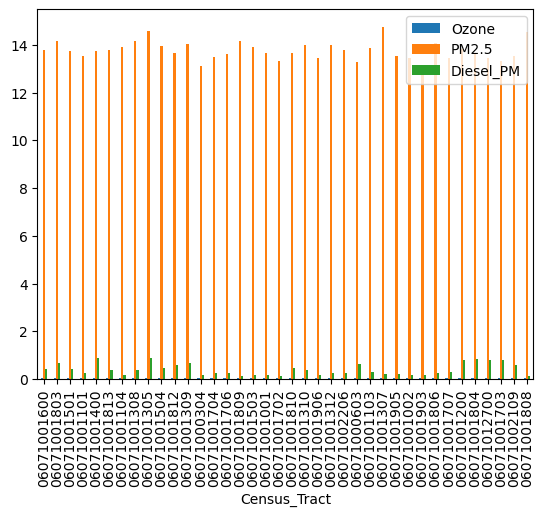

In [28]:
# Create histogram with air pollution concentration data  

health_merge_pollution_notraffic.plot.bar(x='Census_Tract') 

<AxesSubplot: xlabel='Census_Tract'>

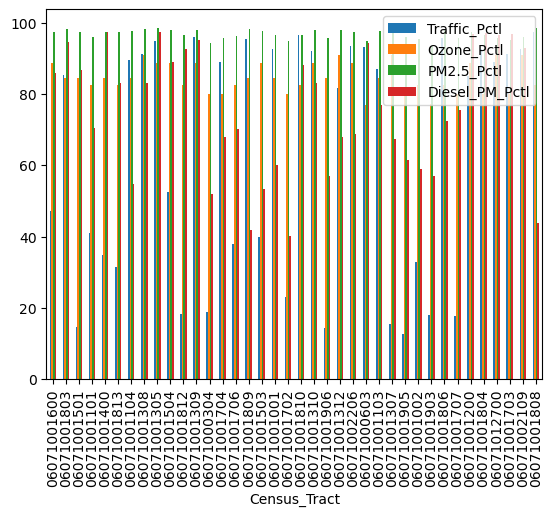

In [29]:
# Create histogram with air pollution percentile and traffic data  

health_merge_pollution_pctl.plot.bar(x='Census_Tract')

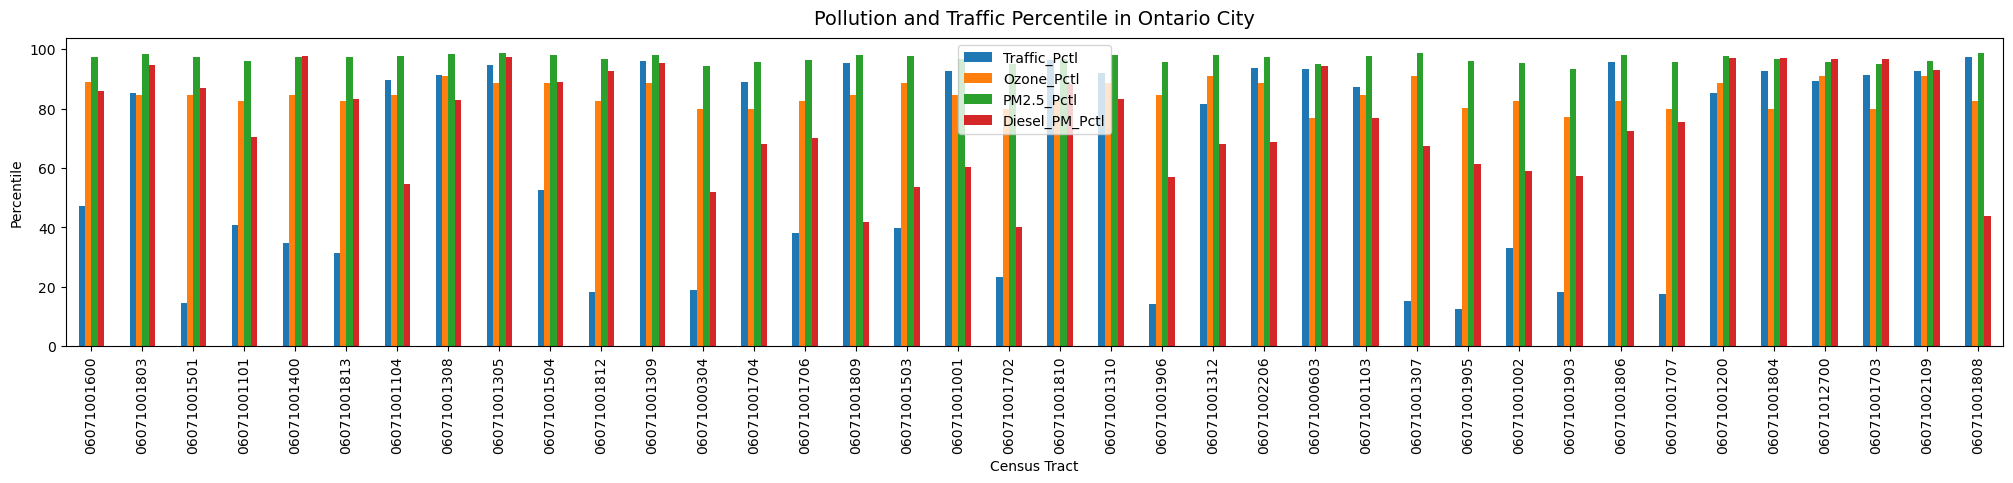

In [30]:
# Make it prettier  
fig, ax = plt.subplots(figsize=(25,4))

health_merge_pollution_pctl.plot.bar(ax=ax,
                                      x='Census_Tract',
                                      legend=True,
                                      )
ax.set_xlabel('Census Tract') # override x label
ax.set_ylabel('Percentile') # override y label
ax.set_title("Pollution and Traffic Percentile in Ontario City",fontsize=14,pad=10); # multi-line title with padding

<AxesSubplot: xlabel='Census_Tract'>

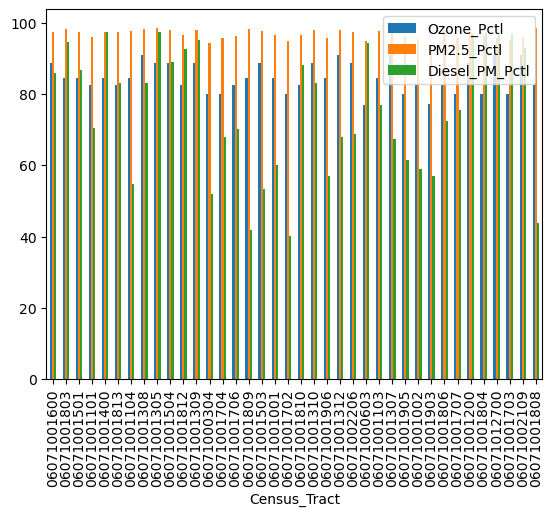

In [31]:
# Create histogram with air pollution percentile  

health_merge_pollution_pctl_notraffic.plot.bar(x='Census_Tract')

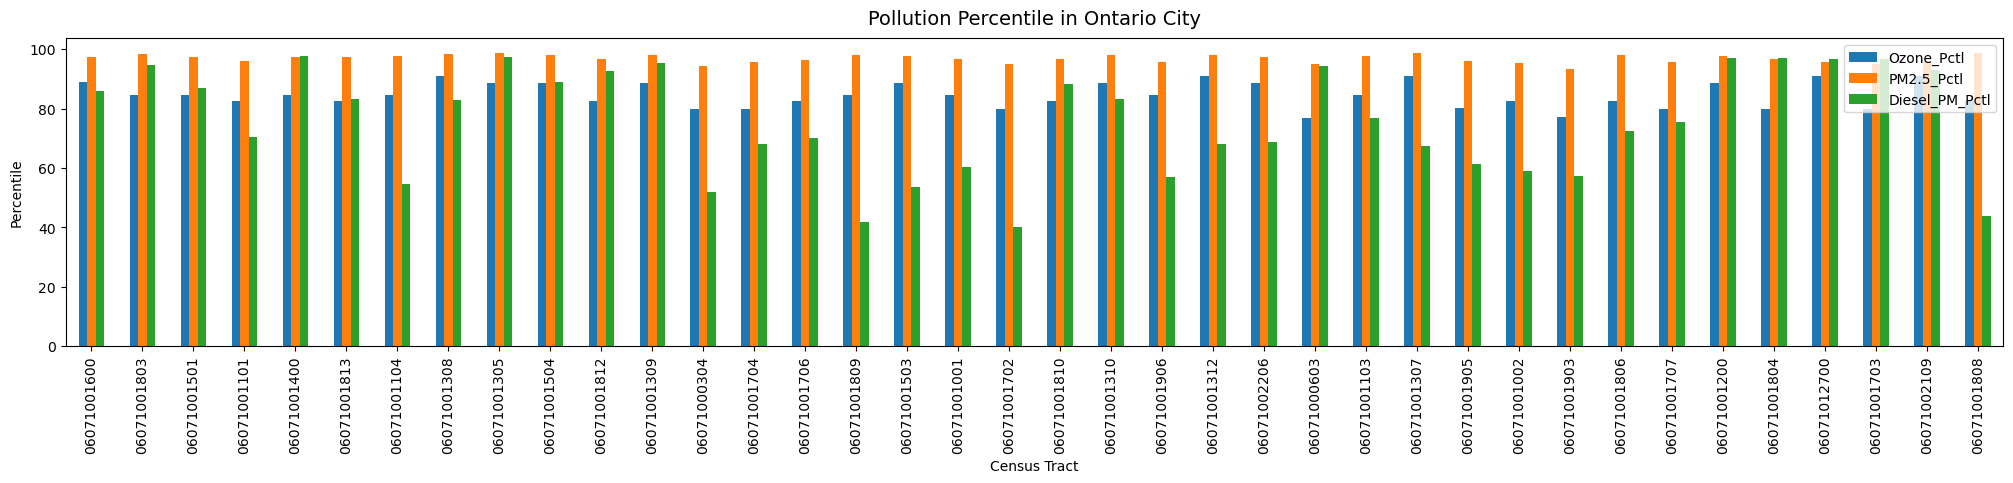

In [32]:
# Create the histogram of pollution percentile without traffic data  

fig, ax = plt.subplots(figsize=(25,4))

health_merge_pollution_pctl_notraffic.plot.bar(ax=ax,
                                      x='Census_Tract',
                                      legend=True,
                                      )
ax.set_xlabel('Census Tract') # override x label
ax.set_ylabel('Percentile') # override y label
ax.set_title("Pollution Percentile in Ontario City",fontsize=14,pad=10); # multi-line title with padding

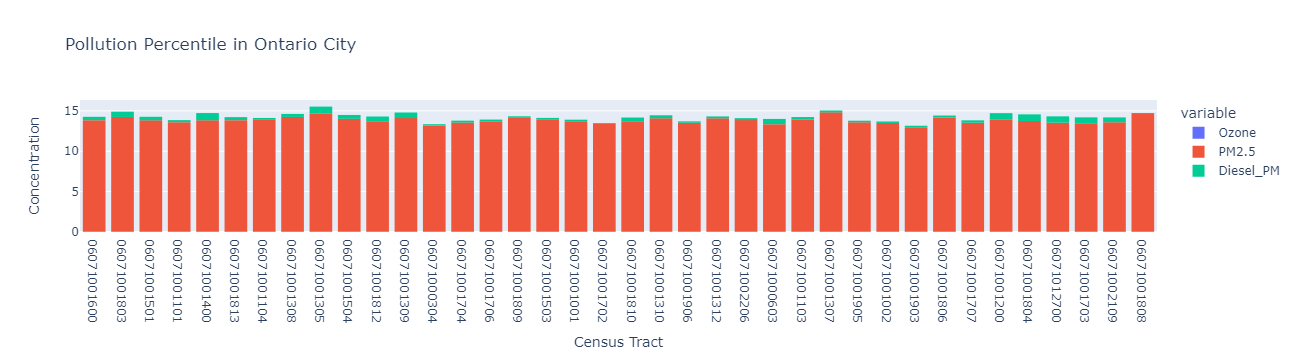

In [33]:
# Create air pollution concentration data histogram with plotly

# add labels by providing a dict
fig = px.bar(
        health_merge_pollution_notraffic,
        x='Census_Tract',
        y=['Ozone', 'PM2.5', 'Diesel_PM'],
        title='Pollution Percentile in Ontario City',
        labels={
            'Census_Tract':'Census Tract',
            'value':'Concentration' 
        
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

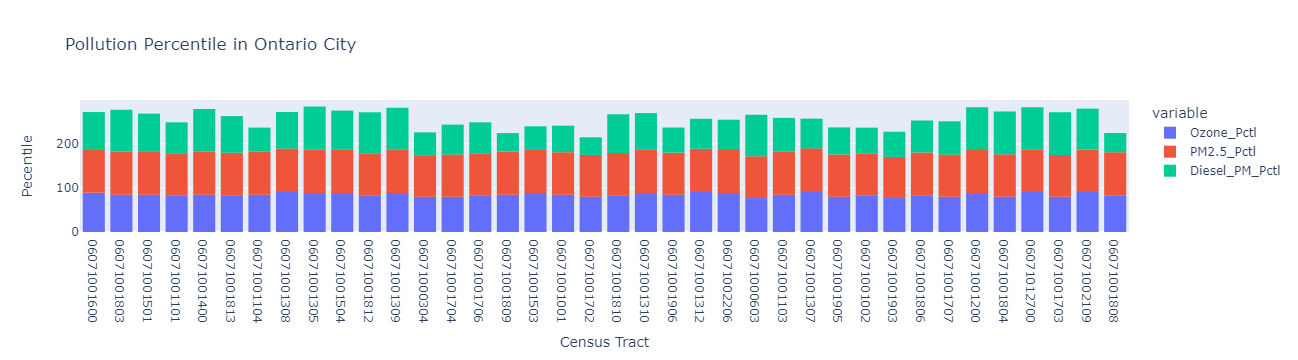

In [34]:
# Create air pollution percentile data histogram with plotly

# add labels by providing a dict
health_merge_pollution_pctl_notraffic = health_merge[['Census_Tract','Ozone_Pctl','PM2.5_Pctl','Diesel_PM_Pctl']]

fig = px.bar(
        health_merge_pollution_pctl_notraffic,
        x='Census_Tract',
        y=['Ozone_Pctl', 'PM2.5_Pctl', 'Diesel_PM_Pctl'],
        title='Pollution Percentile in Ontario City',
        labels={
            'Census_Tract':'Census Tract',
            'value':'Pecentile'        
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [35]:
# Subset the data to diesel percentile

diesel_pctl = health_merge[['Census_Tract','Diesel_PM_Pctl']]
diesel_pctl.sort_values(by='Diesel_PM_Pctl', ascending=False)

Census_Tract  Diesel_PM_Pctl
4   06071001400       97.523335
8   06071001305       97.311761
33  06071001804       97.037959
32  06071001200       96.863721
35  06071001703       96.726820
34  06071012700       96.639701
11  06071001309       95.245800
1   06071001803       94.511512
24  06071000603       94.411948
36  06071002109       93.018046
10  06071001812       92.731798
9   06071001504       88.960797
19  06071001810       88.164281
2   06071001501       86.857498
0   06071001600       86.011201
20  06071001310       83.186061
5   06071001813       83.074051
7   06071001308       83.024269
25  06071001103       76.863721
31  06071001707       75.606721
30  06071001806       72.520224
3   06071001101       70.466708
14  06071001706       70.180460
23  06071002206       68.786559
13  06071001704       68.064717
22  06071001312       68.027380
26  06071001307       67.492222
27  06071001905       61.443684
17  06071001001       60.161792
28  06071001002       58.892346
29  06071001903       57.125078
21  06071001906       57.000622
6   06071001104       54.710641
16  06071001503       53.441195
12  06071000304       51.823273
37  06071001808       43.696329
15  06071001809       41.767268
18  06071001702       40.124456

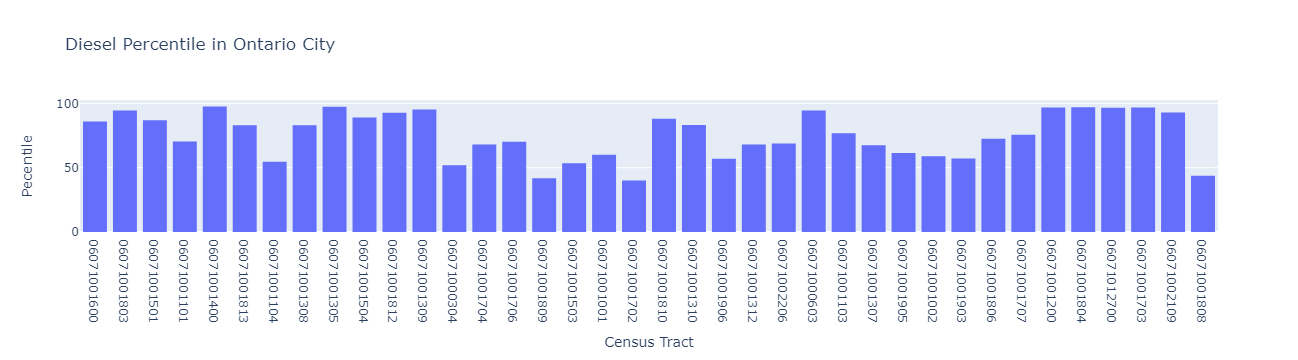

In [36]:
# Create air diesel percentile data histogram with plotly

# add labels by providing a dict
diesel_pctl = health_merge[['Census_Tract','Diesel_PM_Pctl']]
diesel_pctl.sort_values(by='Diesel_PM_Pctl', ascending=False)

fig = px.bar(
        health_merge_pollution_pctl_notraffic,
        x='Census_Tract',
        y='Diesel_PM_Pctl',
        title='Diesel Percentile in Ontario City',
        labels={
            'Census_Tract':'Census Tract',
            'Diesel_PM_Pctl':'Pecentile'        
        }
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()


## Preparing data for mapping

## Simple Map

It's time to make simple maps!

In [37]:
# Check the datatypes first

health_merge.dtypes

Census_Tract        object
Longitude          float64
Latitude           float64
Ozone              float64
Ozone_Pctl         float64
PM2.5              float64
PM2.5_Pctl         float64
Diesel_PM          float64
Diesel_PM_Pctl     float64
Traffic            float64
Traffic_Pctl       float64
geometry          geometry
dtype: object

### Convert dataframe to geodataframe

Before mapping, we have to convert dataframe to geo dataframe

In [38]:
# Change the column name first or the original geometry column will be replaced

health_merge.rename(columns={'geometry': 'geometry_poly'}, inplace=True)
health_merge.head(2)

Census_Tract   Longitude   Latitude     Ozone  Ozone_Pctl      PM2.5  \
0  06071001600 -117.618013  34.057780  0.062441   88.823895  13.785161   
1  06071001803 -117.617420  34.040951  0.061338   84.579963  14.184804   

   PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl      Traffic  Traffic_Pctl  \
0   97.398880   0.418891       86.011201   842.733027        47.275   
1   98.232732   0.653880       94.511512  1888.972913        85.375   

                                       geometry_poly  
0  POLYGON ((-117.68086 34.05986, -117.68084 34.0...  
1  POLYGON ((-117.63661 34.05498, -117.63667 34.0...

In [39]:
# convert health_merge to geodataframe

g_health_merge = gpd.GeoDataFrame(
    health_merge, geometry=gpd.points_from_xy(health_merge.Longitude, health_merge.Latitude),crs=4326)


In [40]:
# output the data's projection

g_health_merge.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
# Check the dataframe

g_health_merge.head(2)

Census_Tract   Longitude   Latitude     Ozone  Ozone_Pctl      PM2.5  \
0  06071001600 -117.618013  34.057780  0.062441   88.823895  13.785161   
1  06071001803 -117.617420  34.040951  0.061338   84.579963  14.184804   

   PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl      Traffic  Traffic_Pctl  \
0   97.398880   0.418891       86.011201   842.733027        47.275   
1   98.232732   0.653880       94.511512  1888.972913        85.375   

                                       geometry_poly  \
0  POLYGON ((-117.68086 34.05986, -117.68084 34.0...   
1  POLYGON ((-117.63661 34.05498, -117.63667 34.0...   

                      geometry  
0  POINT (-117.61801 34.05778)  
1  POINT (-117.61742 34.04095)

In [42]:
# Change the column name from 'geometry' to 'geometry_point'

health_merge.rename(columns={'geometry': 'geometry_point'}, inplace=True)
health_merge.head(2)

Census_Tract   Longitude   Latitude     Ozone  Ozone_Pctl      PM2.5  \
0  06071001600 -117.618013  34.057780  0.062441   88.823895  13.785161   
1  06071001803 -117.617420  34.040951  0.061338   84.579963  14.184804   

   PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl      Traffic  Traffic_Pctl  \
0   97.398880   0.418891       86.011201   842.733027        47.275   
1   98.232732   0.653880       94.511512  1888.972913        85.375   

                                       geometry_poly  \
0  POLYGON ((-117.68086 34.05986, -117.68084 34.0...   
1  POLYGON ((-117.63661 34.05498, -117.63667 34.0...   

                geometry_point  
0  POINT (-117.61801 34.05778)  
1  POINT (-117.61742 34.04095)

In [43]:
# Change the column name from 'geometry_poly' to 'geometry'

health_merge.rename(columns={'geometry_poly': 'geometry'}, inplace=True)
health_merge.head(2)

Census_Tract   Longitude   Latitude     Ozone  Ozone_Pctl      PM2.5  \
0  06071001600 -117.618013  34.057780  0.062441   88.823895  13.785161   
1  06071001803 -117.617420  34.040951  0.061338   84.579963  14.184804   

   PM2.5_Pctl  Diesel_PM  Diesel_PM_Pctl      Traffic  Traffic_Pctl  \
0   97.398880   0.418891       86.011201   842.733027        47.275   
1   98.232732   0.653880       94.511512  1888.972913        85.375   

                                            geometry  \
0  POLYGON ((-117.68086 34.05986, -117.68084 34.0...   
1  POLYGON ((-117.63661 34.05498, -117.63667 34.0...   

                geometry_point  
0  POINT (-117.61801 34.05778)  
1  POINT (-117.61742 34.04095)

<AxesSubplot: >

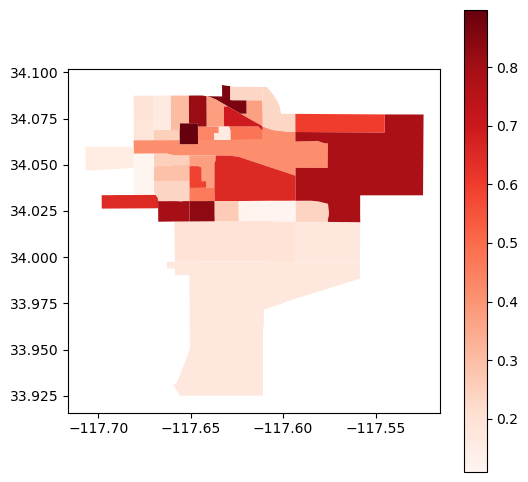

In [44]:
# Create choropleth map of diesel concentration

fig,ax = plt.subplots(figsize=(6,6))

g_health_merge.plot(ax=ax,column='Diesel_PM',legend=True,cmap='Reds')

<AxesSubplot: >

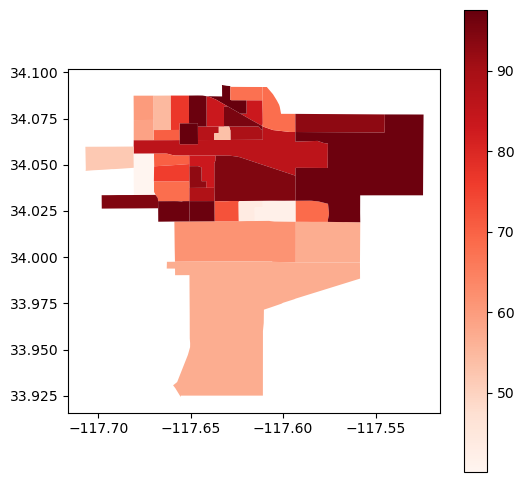

In [45]:
# Create choropleth map of diesel percentile

fig,ax = plt.subplots(figsize=(6,6))

g_health_merge.plot(ax=ax,column='Diesel_PM_Pctl',legend=True,cmap='Reds')

<AxesSubplot: >

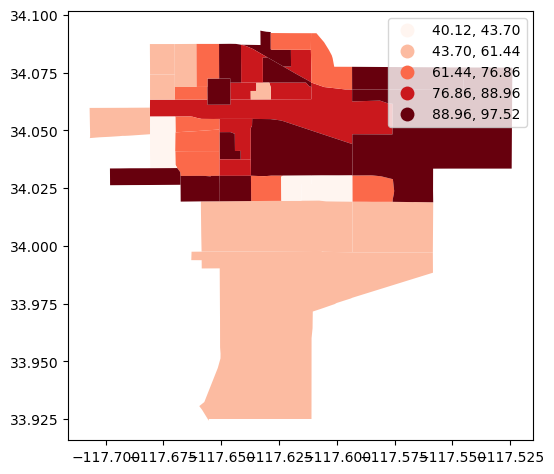

In [57]:
# Create choropleth map of diesel percentile with the catogories of "NaturalBreaks"

g_health_merge.plot(figsize=(6,6),
                 column='Diesel_PM_Pctl',
                 cmap='Reds',
                 legend=True, 
                 scheme='NaturalBreaks')

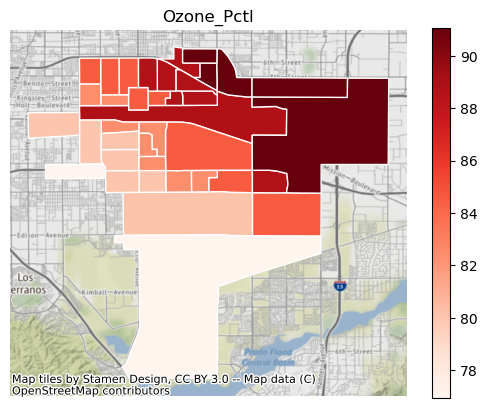

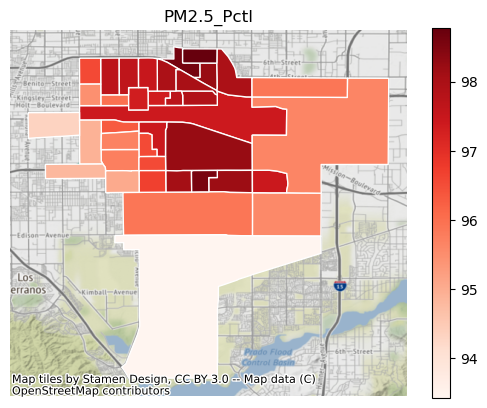

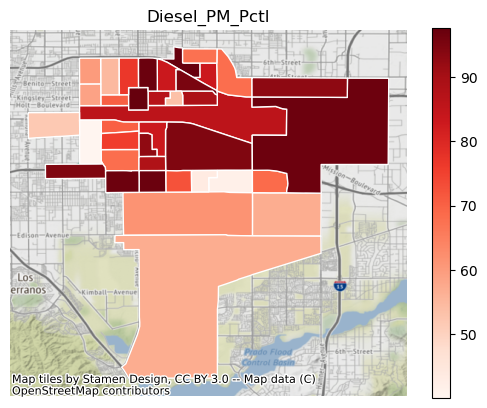

In [58]:
# Make the loop of the pollution with basemap 

# Create the variables
variables = ['Ozone_Pctl',
 'PM2.5_Pctl',
 'Diesel_PM_Pctl']

for variable in variables:
    ax = g_health_merge.plot(column=variable, cmap='Reds', edgecolor="White", legend=True)
    ax.set_title(variable)
    ax.set_axis_off()
    ctx.add_basemap(ax, crs=4326)